In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the Excel file to inspect its structure and the sheet names.
file_path = 'Data Science Hackathon dataset.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
excel_data.sheet_names


['Data Science Hackathon dataset']

In [2]:
# Load the main sheet to inspect its content and perform EDA
df = pd.read_excel(excel_data, sheet_name='Data Science Hackathon dataset')

# Display the first few rows and general info to understand the structure and data types
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139390 entries, 0 to 139389
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                          Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                          --------------   ----- 


(  InsurProductID|InsurCustomerID|Sub Seg|Insurance Currency|Insur Sub Name|Insur Bank Related|Insur PackName|Product Status|Insur Value|Insur Open Date|Insur Cancellation Date|Insur end date|Next Pay Date|Last Pay Date|NO_OF_TRXNS202005|NO_OF_TRXNS202006|NO_OF_TRXNS202007|NO_OF_TRXNS202008|NO_OF_TRXNS202009|NO_OF_TRXNS202010|TURNOVER202005|TURNOVER202006|TURNOVER202007|TURNOVER202008|TURNOVER202009|TURNOVER202010  \
 0  LFC484L84|475143751|EXCELLENCE|MZN|SEGURO DE V...                                                                                                                                                                                                                                                                                                                                                                               
 1  HOC484H84|475143751|EXCELLENCE|MZN|SEGURO DE I...                                                                                                         

In [3]:
# Split the first column into separate columns using the '|' delimiter
df_split = df.iloc[:, 0].str.split('|', expand=True)

# Renaming the columns based on the identified headers for easier analysis
df_split.columns = [
    "InsurProductID", "InsurCustomerID", "Sub_Seg", "Insurance_Currency", "Insur_Sub_Name", 
    "Insur_Bank_Related", "Insur_PackName", "Product_Status", "Insur_Value", "Insur_Open_Date", 
    "Insur_Cancellation_Date", "Insur_End_Date", "Next_Pay_Date", "Last_Pay_Date", 
    "NO_OF_TRXNS202005", "NO_OF_TRXNS202006", "NO_OF_TRXNS202007", "NO_OF_TRXNS202008", 
    "NO_OF_TRXNS202009", "NO_OF_TRXNS202010", "TURNOVER202005", "TURNOVER202006", 
    "TURNOVER202007", "TURNOVER202008", "TURNOVER202009", "TURNOVER202010"
]

# Dropping the second column in the original dataframe as it appears mostly irrelevant
df_split.dropna(axis=1, how='all', inplace=True)

# Display first few rows of the cleaned dataset to confirm structure
df_split.head()


,InsurProductID,InsurCustomerID,Sub_Seg,Insurance_Currency,Insur_Sub_Name,Insur_Bank_Related,Insur_PackName,Product_Status,Insur_Value,Insur_Open_Date,...,NO_OF_TRXNS202007,NO_OF_TRXNS202008,NO_OF_TRXNS202009,NO_OF_TRXNS202010,TURNOVER202005,TURNOVER202006,TURNOVER202007,TURNOVER202008,TURNOVER202009,TURNOVER202010
0,LFC484L84,475143751,EXCELLENCE,MZN,SEGURO DE VIDA,BANK PRODUCTS RELATED,LIFE,ACTIVE,0.00,3/26/2013 12:00:00 AM,...,61,83,61,59,238558.20284615,262221.48884615,301020.335,229569.0262963,226266.91481481,217867.91177419
1,HOC484H84,475143751,EXCELLENCE,MZN,SEGURO DE INCÊNDIO HABITAÇÃO,BANK PRODUCTS RELATED,HOUSE.OWNER,ACTIVE,0.00,3/26/2013 12:00:00 AM,...,61,83,61,59,238558.20284615,262221.48884615,301020.335,229569.0262963,226266.91481481,217867.91177419
2,SBS025S25,628865188,GENNESIS,MZN,PLANO SALARIO,NON BANK RELATED,SP.BLUE,CANCELLED,0.00,7/3/2018 12:00:00 AM,...,8,7,18,11,7968.0634615385,7377.8365384615,8043.9,9608.7532222222,9207.5236296296,8935.0903225806
3,SBS149S49,169913599,PMO2,MZN,,NON BANK RELATED,,ACTIVE,0.00,7/31/2019 12:00:00 AM,...,,,,,,,,,,
4,SBS005S05,558654486,FAMMILY,MZN,,NON BANK RELATED,,ACTIVE,0.00,9/12/2019 12:00:00 AM,...,24,31,26,52,370471.99719231,251616.88884615,61927.235,73461.539,53934.812,145213.38690323


In [4]:
# Checking data types and summary statistics to understand the numerical and date columns for EDA
df_split.info(), df_split.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139390 entries, 0 to 139389
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   InsurProductID           139390 non-null  object
 1   InsurCustomerID          139390 non-null  object
 2   Sub_Seg                  139390 non-null  object
 3   Insurance_Currency       139390 non-null  object
 4   Insur_Sub_Name           139390 non-null  object
 5   Insur_Bank_Related       139390 non-null  object
 6   Insur_PackName           139390 non-null  object
 7   Product_Status           139390 non-null  object
 8   Insur_Value              139390 non-null  object
 9   Insur_Open_Date          128614 non-null  object
 10  Insur_Cancellation_Date  128614 non-null  object
 11  Insur_End_Date           128614 non-null  object
 12  Next_Pay_Date            128614 non-null  object
 13  Last_Pay_Date            128614 non-null  object
 14  NO_OF_TRXNS202005   

(None,
        InsurProductID InsurCustomerID   Sub_Seg Insurance_Currency  \
 count          139390          139390    139390             139390   
 unique           8224           84429         8                  2   
 top         SBL001S01       900090000  GENNESIS                MZN   
 freq              582             544     91947             138880   
 
         Insur_Sub_Name Insur_Bank_Related Insur_PackName Product_Status  \
 count           139390             139390         139390         139390   
 unique              14                  2             35              4   
 top     PLANO HOSPITAL   NON BANK RELATED        FUNERAL         ACTIVE   
 freq             37216             114905          31328          86860   
 
        Insur_Value        Insur_Open_Date  ... NO_OF_TRXNS202007  \
 count       139390                 128614  ...            128614   
 unique        4569                   2937  ...               399   
 top         200.00  8/31/2020 12:00:00 AM  ...

In [5]:
# Converting columns to appropriate data types where applicable

# Converting date columns
date_columns = [
    "Insur_Open_Date", "Insur_Cancellation_Date", "Insur_End_Date", 
    "Next_Pay_Date", "Last_Pay_Date"
]
for col in date_columns:
    df_split[col] = pd.to_datetime(df_split[col], errors='coerce')

# Converting transaction and turnover columns to numeric, setting errors='coerce' to handle non-numeric values
transaction_columns = [
    "NO_OF_TRXNS202005", "NO_OF_TRXNS202006", "NO_OF_TRXNS202007", 
    "NO_OF_TRXNS202008", "NO_OF_TRXNS202009", "NO_OF_TRXNS202010"
]
turnover_columns = [
    "TURNOVER202005", "TURNOVER202006", "TURNOVER202007", 
    "TURNOVER202008", "TURNOVER202009", "TURNOVER202010"
]

for col in transaction_columns + turnover_columns:
    df_split[col] = pd.to_numeric(df_split[col], errors='coerce')

# Converting 'Insur_Value' to numeric
df_split['Insur_Value'] = pd.to_numeric(df_split['Insur_Value'], errors='coerce')

# Checking updated info
df_split.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139390 entries, 0 to 139389
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InsurProductID           139390 non-null  object        
 1   InsurCustomerID          139390 non-null  object        
 2   Sub_Seg                  139390 non-null  object        
 3   Insurance_Currency       139390 non-null  object        
 4   Insur_Sub_Name           139390 non-null  object        
 5   Insur_Bank_Related       139390 non-null  object        
 6   Insur_PackName           139390 non-null  object        
 7   Product_Status           139390 non-null  object        
 8   Insur_Value              139389 non-null  float64       
 9   Insur_Open_Date          128609 non-null  datetime64[ns]
 10  Insur_Cancellation_Date  44644 non-null   datetime64[ns]
 11  Insur_End_Date           2901 non-null    datetime64[ns]
 12  Next_Pay_Date   

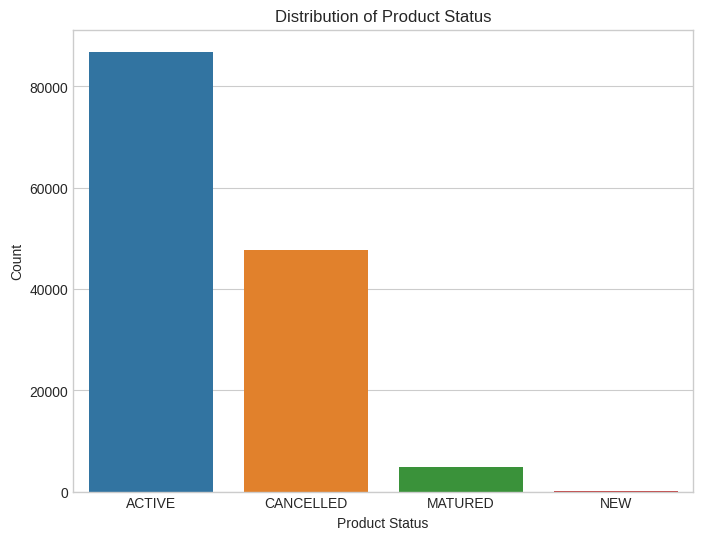

In [6]:
# Setting up the figure aesthetics
plt.style.use('seaborn-whitegrid')

# Distribution of Product Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df_split, x='Product_Status', order=df_split['Product_Status'].value_counts().index)
plt.title('Distribution of Product Status')
plt.xlabel('Product Status')
plt.ylabel('Count')
plt.show()

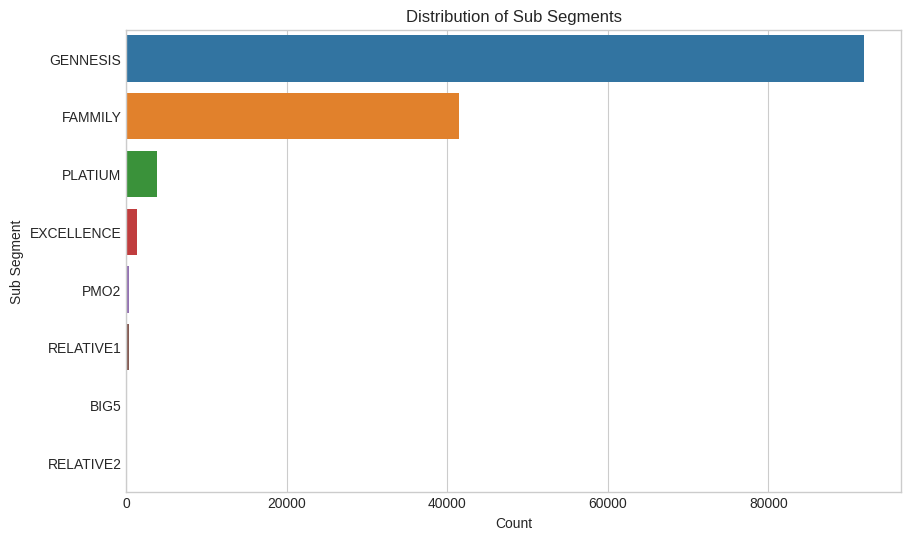

In [7]:
# Distribution of Sub Segments
plt.figure(figsize=(10, 6))
sns.countplot(data=df_split, y='Sub_Seg', order=df_split['Sub_Seg'].value_counts().index)
plt.title('Distribution of Sub Segments')
plt.xlabel('Count')
plt.ylabel('Sub Segment')
plt.show()

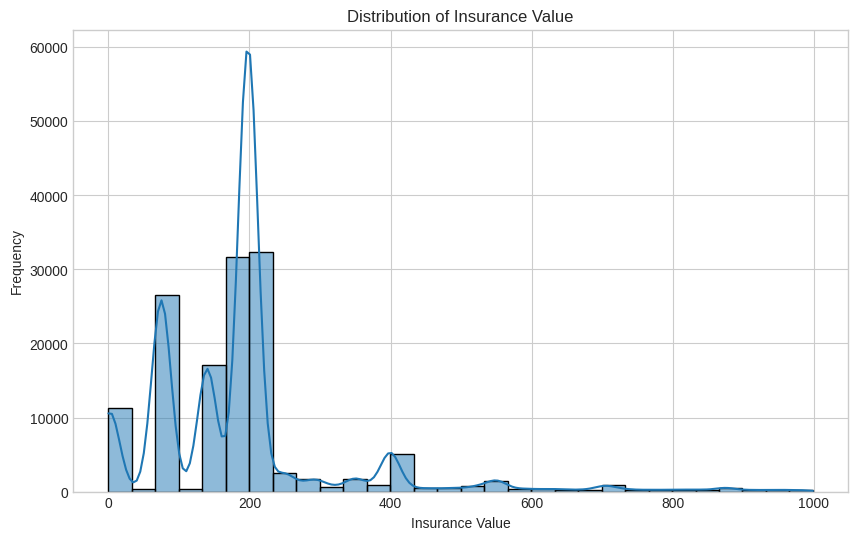

In [8]:
# Distribution of Insurance Value
plt.figure(figsize=(10, 6))
sns.histplot(df_split['Insur_Value'], bins=30, kde=True)
plt.title('Distribution of Insurance Value')
plt.xlabel('Insurance Value')
plt.ylabel('Frequency')
plt.show()

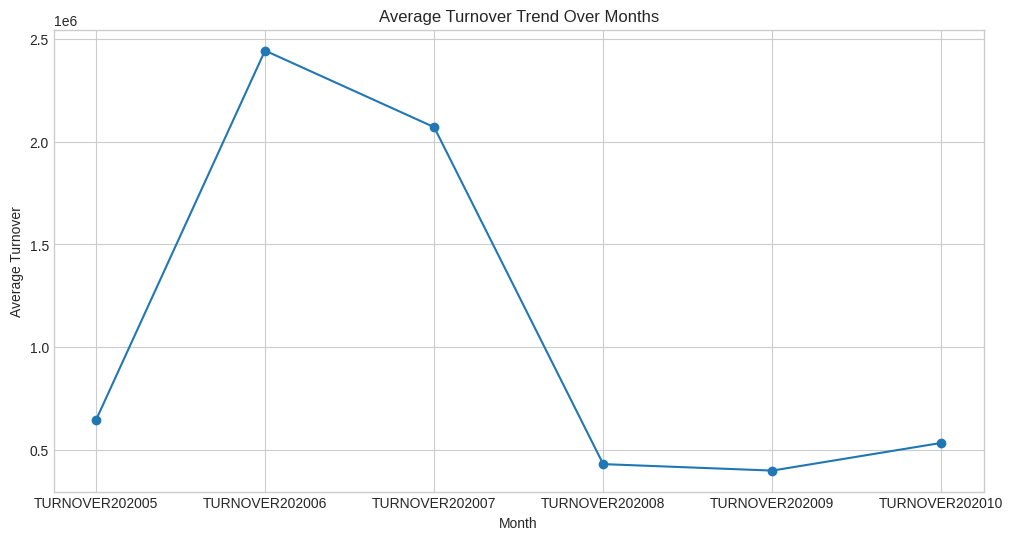

In [9]:
# Turnover Trend Over Months (Mean Turnover Per Month)
turnover_means = df_split[turnover_columns].mean()
plt.figure(figsize=(12, 6))
plt.plot(turnover_columns, turnover_means, marker='o')
plt.title('Average Turnover Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Average Turnover')
plt.show()

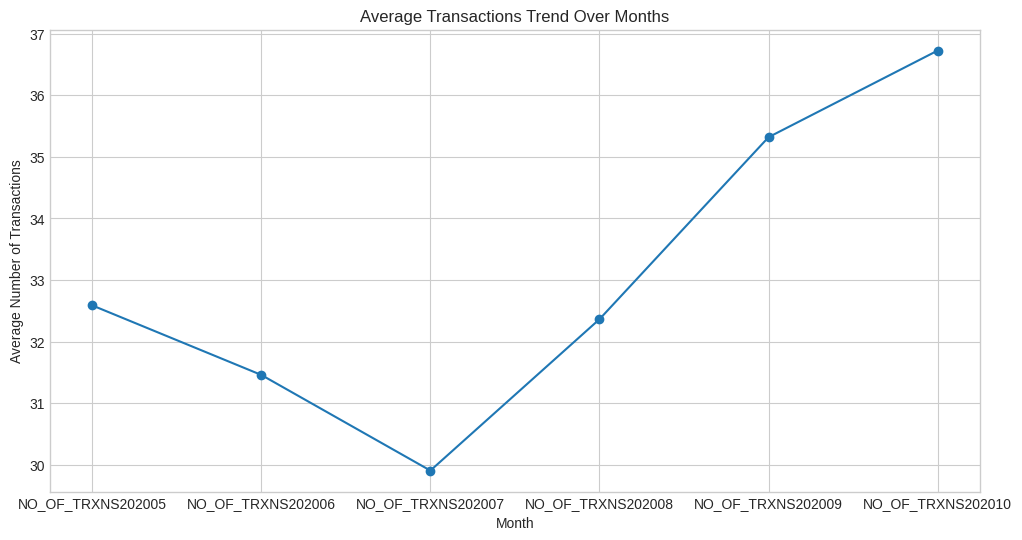

In [10]:
# Average Transactions Over Time (for the NO_OF_TRXNS columns)
transaction_means = df_split[transaction_columns].mean()
plt.figure(figsize=(12, 6))
plt.plot(transaction_columns, transaction_means, marker='o')
plt.title('Average Transactions Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Average Number of Transactions')
plt.show()

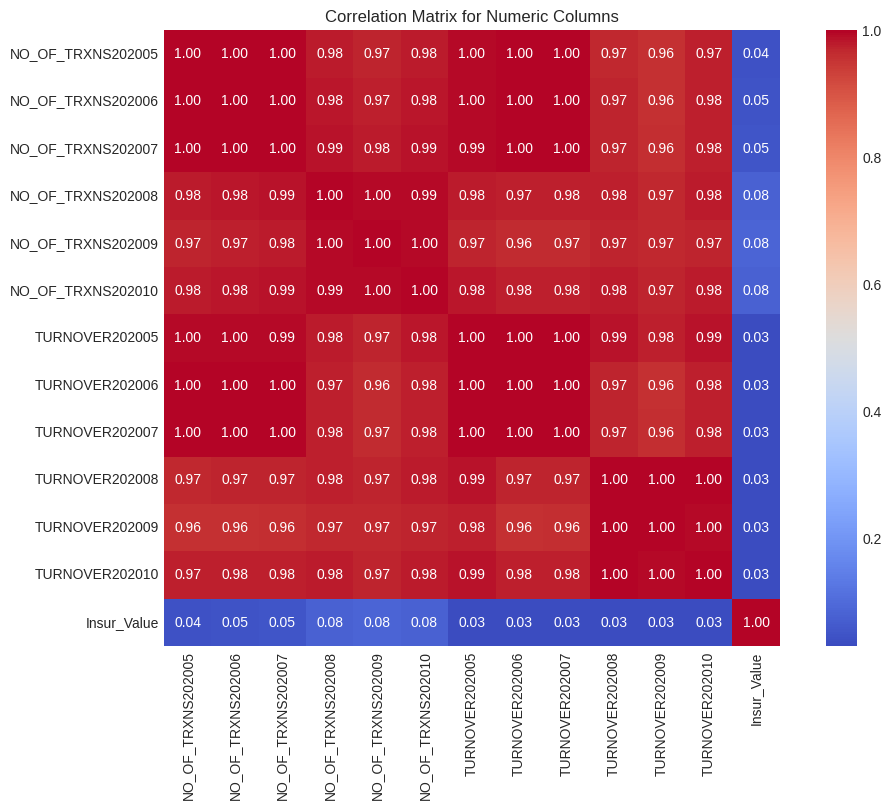

In [11]:
import numpy as np

# Calculating the correlation matrix for numeric columns
numeric_columns = transaction_columns + turnover_columns + ['Insur_Value']
correlation_matrix = df_split[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

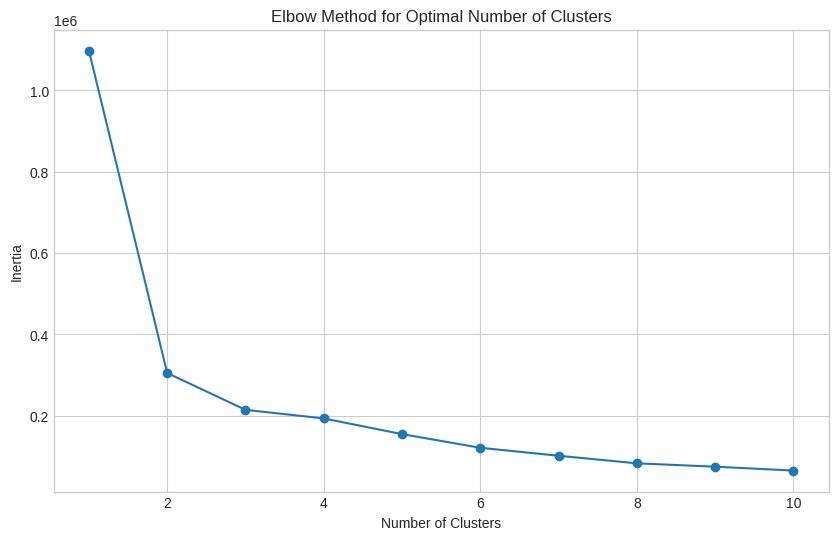

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Selecting features relevant for customer segmentation
# We'll use 'Insur_Value' and average transaction & turnover values across months
df_segmentation = df_split[['InsurCustomerID', 'Insur_Value'] + transaction_columns + turnover_columns]

# Replacing missing values with 0 for segmentation analysis
df_segmentation = df_segmentation.fillna(0)

# Aggregating transactions and turnover per customer (mean values for simplicity in segmentation)
df_segmentation = df_segmentation.groupby('InsurCustomerID').agg({
    'Insur_Value': 'mean',
    **{col: 'mean' for col in transaction_columns},
    **{col: 'mean' for col in turnover_columns}
}).reset_index()

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_segmentation.drop('InsurCustomerID', axis=1))

# Choosing a reasonable number of clusters
# Running KMeans for a range of clusters and calculating inertia (elbow method)
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


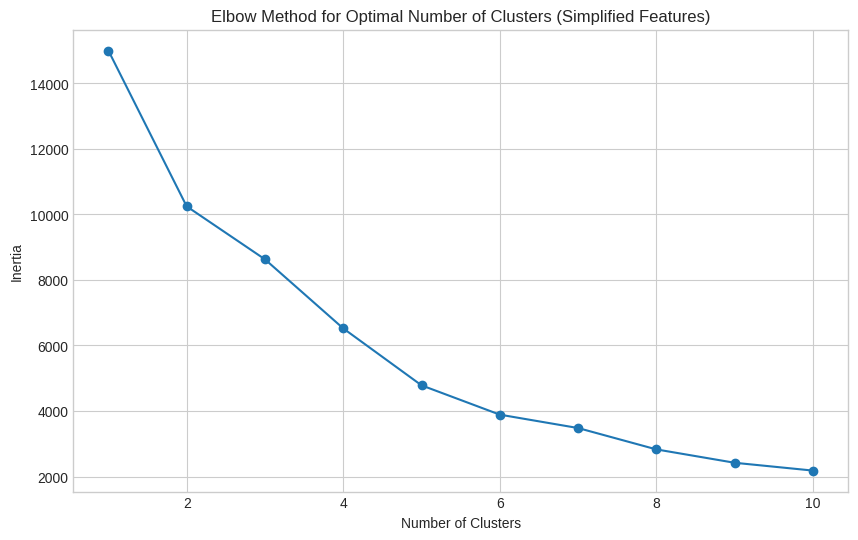

In [13]:
import warnings
warnings.filterwarnings("ignore")

# Simplifying the segmentation analysis by using a limited set of features
df_segmentation_simple = df_segmentation[['InsurCustomerID', 'Insur_Value']]
df_segmentation_simple['Avg_Transactions'] = df_segmentation[transaction_columns].mean(axis=1)
df_segmentation_simple['Avg_Turnover'] = df_segmentation[turnover_columns].mean(axis=1)

# Sampling the simplified data for clustering
df_segmentation_simple_sample = df_segmentation_simple.sample(n=5000, random_state=42)

# Scaling the simplified features
scaled_features_simple = scaler.fit_transform(df_segmentation_simple_sample[['Insur_Value', 'Avg_Transactions', 'Avg_Turnover']])

# Running the elbow method with the simplified features
inertia_simple = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features_simple)
    inertia_simple.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_simple, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (Simplified Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [14]:
# Re-creating all segmentation columns to ensure consistency and avoid further KeyErrors

# Insurance value-based segmentation
df_segmentation_simple['Insur_Value_Segment'] = pd.cut(
    df_segmentation_simple['Insur_Value'].clip(lower=0),
    bins=[0, 1000, 5000, 10000],  # Static bins for simplicity
    labels=['Low Value', 'Medium Value', 'High Value'],
    include_lowest=True
)

# Transaction-based segmentation
df_segmentation_simple['Transaction_Segment'] = pd.cut(
    df_segmentation_simple['Avg_Transactions'].clip(lower=0),
    bins=[0, 10, 50, 100],  # Static bins
    labels=['Low', 'Moderate', 'High'],
    include_lowest=True
)

# Turnover-based segmentation
df_segmentation_simple['Turnover_Segment'] = pd.cut(
    df_segmentation_simple['Avg_Turnover'].clip(lower=0),
    bins=[0, 5000, 20000, 50000],  # Static bins
    labels=['Low', 'Moderate', 'High'],
    include_lowest=True
)

# Confirming the presence of all required segments
df_segmentation_simple.head()


,InsurCustomerID,Insur_Value,Avg_Transactions,Avg_Turnover,Insur_Value_Segment,Transaction_Segment,Turnover_Segment
0,100010600,215.333333,29.666667,26533.733151,Low Value,Moderate,High
1,100014800,296.730000,19.166667,5576.278683,Low Value,Moderate,Moderate
2,100016300,198.000000,0.000000,0.000000,Low Value,Low,Low
3,100017700,565.250000,41.000000,98802.438204,Low Value,Moderate,NaN
4,100019100,200.000000,16.666667,20083.178181,Low Value,Moderate,High


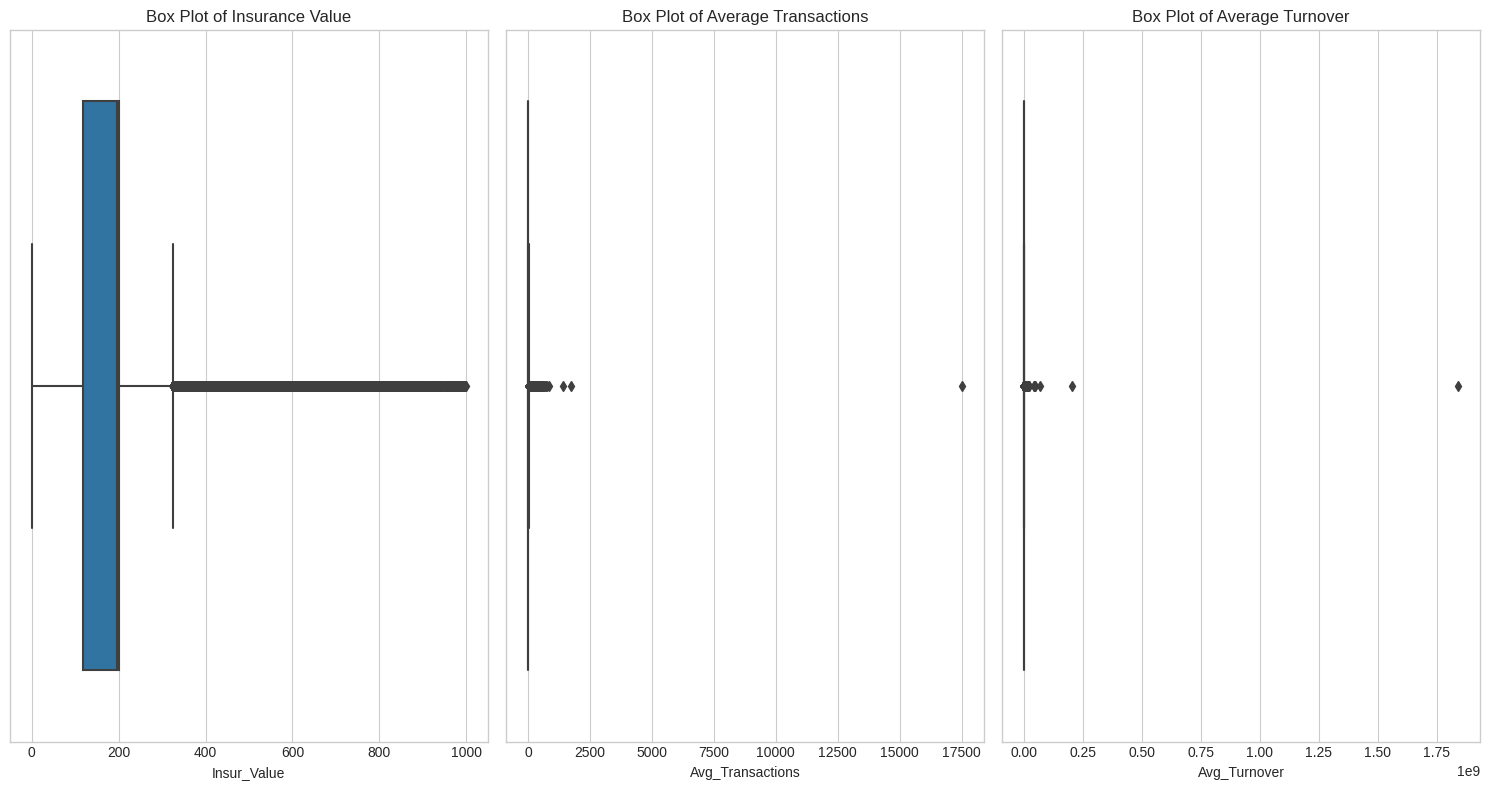

In [15]:
# Using box plots to check for outliers in key numeric features

# Setting up the figure
plt.figure(figsize=(15, 8))

# Plotting box plots for 'Insur_Value', 'Avg_Transactions', and 'Avg_Turnover' to detect outliers
plt.subplot(1, 3, 1)
sns.boxplot(x=df_segmentation_simple['Insur_Value'])
plt.title('Box Plot of Insurance Value')

plt.subplot(1, 3, 2)
sns.boxplot(x=df_segmentation_simple['Avg_Transactions'])
plt.title('Box Plot of Average Transactions')

plt.subplot(1, 3, 3)
sns.boxplot(x=df_segmentation_simple['Avg_Turnover'])
plt.title('Box Plot of Average Turnover')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Define target variable - 'High' turnover segment (binary classification)
df_segmentation_simple['High_Turnover_Label'] = (df_segmentation_simple['Turnover_Segment'] == 'High').astype(int)

# Step 2: Selecting relevant features for modeling
# Here we use Insur_Value and Avg_Transactions as primary numeric features
X = df_segmentation_simple[['Insur_Value', 'Avg_Transactions']]
y = df_segmentation_simple['High_Turnover_Label']

# Step 3: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# accuracy, classification_rep


In [17]:
# Formatting the classification report for better readability
report = classification_report(y_test, y_pred, target_names=["Non-High Turnover", "High Turnover"])
print("Classification Report:\n")
print(report)

# Displaying the accuracy as a separate metric
print(f"Overall Accuracy: {accuracy * 100:.2f}%")


Classification Report:

                   precision    recall  f1-score   support

Non-High Turnover       0.91      0.94      0.93     14651
    High Turnover       0.51      0.39      0.44      2235

         accuracy                           0.87     16886
        macro avg       0.71      0.67      0.68     16886
     weighted avg       0.86      0.87      0.86     16886

Overall Accuracy: 87.00%


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Trying a different model: Gradient Boosting Classifier
# Training the Gradient Boosting model on the same features
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions and evaluation for the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb, target_names=["Non-High Turnover", "High Turnover"])

# Displaying the results
print("Gradient Boosting Classifier Report:\n")
print(classification_rep_gb)
print(f"Overall Accuracy: {accuracy_gb * 100:.2f}%")


Gradient Boosting Classifier Report:

                   precision    recall  f1-score   support

Non-High Turnover       0.90      0.97      0.93     14651
    High Turnover       0.61      0.26      0.37      2235

         accuracy                           0.88     16886
        macro avg       0.75      0.62      0.65     16886
     weighted avg       0.86      0.88      0.86     16886

Overall Accuracy: 88.05%


In [19]:
from sklearn.linear_model import LogisticRegression

# Trying a Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter to ensure convergence
log_reg_model.fit(X_train_scaled, y_train)

# Predictions and evaluation for the Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg, target_names=["Non-High Turnover", "High Turnover"])

# Displaying the results
print("Logistic Regression Report:\n")
print(classification_rep_log_reg)
print(f"Overall Accuracy: {accuracy_log_reg * 100:.2f}%")


Logistic Regression Report:

                   precision    recall  f1-score   support

Non-High Turnover       0.87      1.00      0.93     14651
    High Turnover       0.04      0.00      0.00      2235

         accuracy                           0.86     16886
        macro avg       0.45      0.50      0.46     16886
     weighted avg       0.76      0.86      0.80     16886

Overall Accuracy: 86.45%


In [20]:
# Removing outliers using the interquartile range (IQR) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying outlier removal on key columns
df_no_outliers = remove_outliers(df_segmentation_simple, 'Insur_Value')
df_no_outliers = remove_outliers(df_no_outliers, 'Avg_Transactions')
df_no_outliers = remove_outliers(df_no_outliers, 'Avg_Turnover')

# Setting up the features and target again after removing outliers
X_no_outliers = df_no_outliers[['Insur_Value', 'Avg_Transactions']]
y_no_outliers = (df_no_outliers['Avg_Turnover'] > 20000).astype(int)  # Using a binary target for high turnover

# Re-splitting the data
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Scaling the data
X_train_scaled_no_outliers = scaler.fit_transform(X_train_no_outliers)
X_test_scaled_no_outliers = scaler.transform(X_test_no_outliers)

# Re-running the Gradient Boosting Classifier on the data without outliers
gb_model_no_outliers = GradientBoostingClassifier(random_state=42)
gb_model_no_outliers.fit(X_train_scaled_no_outliers, y_train_no_outliers)

# Predictions and evaluation
y_pred_gb_no_outliers = gb_model_no_outliers.predict(X_test_scaled_no_outliers)
accuracy_gb_no_outliers = accuracy_score(y_test_no_outliers, y_pred_gb_no_outliers)
classification_rep_gb_no_outliers = classification_report(y_test_no_outliers, y_pred_gb_no_outliers, target_names=["Non-High Turnover", "High Turnover"])

# Displaying the results
print("Gradient Boosting Classifier Report (After Outlier Removal):\n")
print(classification_rep_gb_no_outliers)
print(f"Overall Accuracy: {accuracy_gb_no_outliers * 100:.2f}%")


Gradient Boosting Classifier Report (After Outlier Removal):

                   precision    recall  f1-score   support

Non-High Turnover       0.94      0.99      0.96     11655
    High Turnover       0.66      0.24      0.35       962

         accuracy                           0.93     12617
        macro avg       0.80      0.62      0.66     12617
     weighted avg       0.92      0.93      0.92     12617

Overall Accuracy: 93.28%


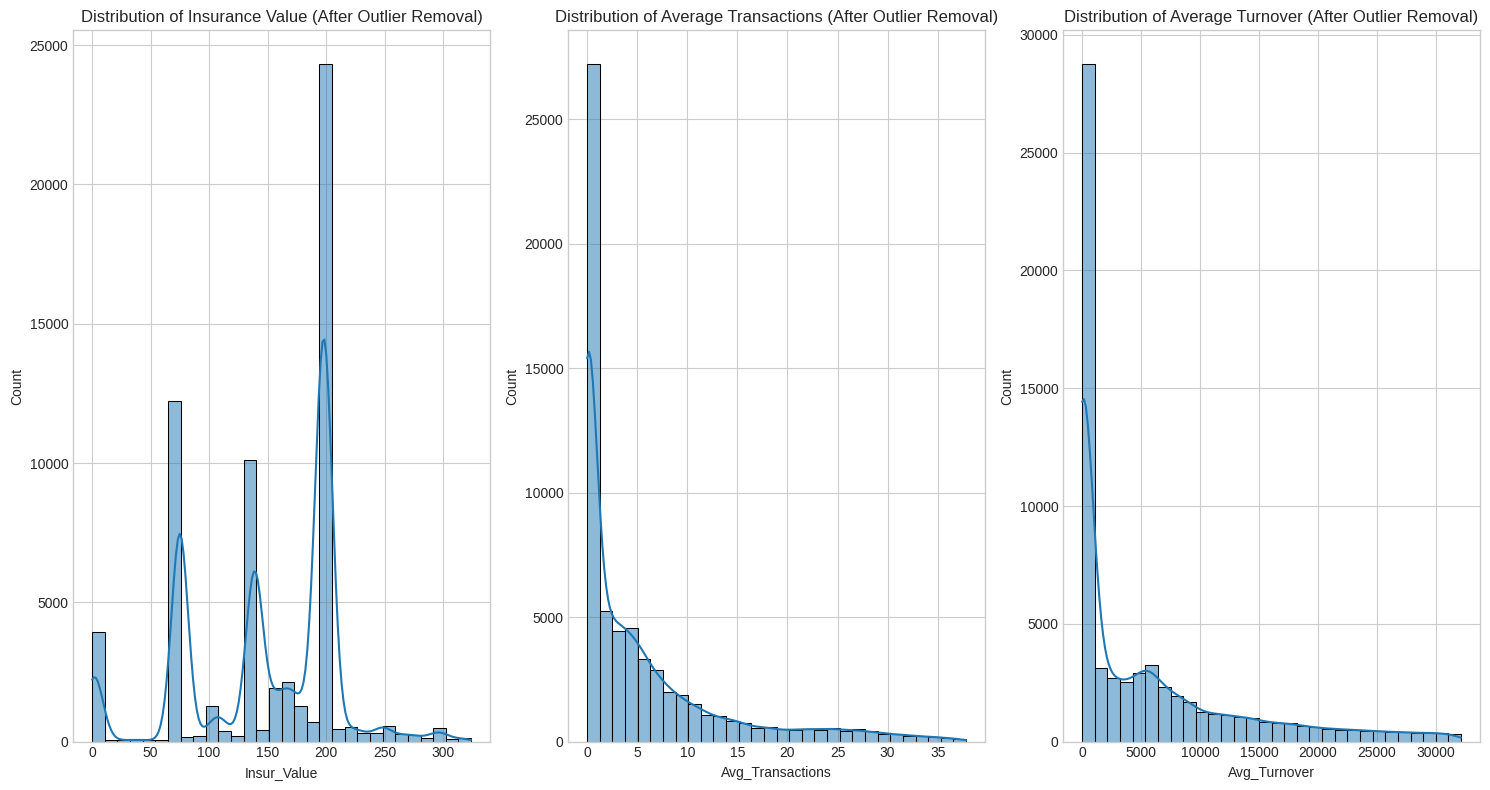

In [21]:
# Visualizing data distributions for key features after outlier removal
plt.figure(figsize=(15, 8))

# Histogram for 'Insur_Value'
plt.subplot(1, 3, 1)
sns.histplot(df_no_outliers['Insur_Value'], bins=30, kde=True)
plt.title('Distribution of Insurance Value (After Outlier Removal)')

# Histogram for 'Avg_Transactions'
plt.subplot(1, 3, 2)
sns.histplot(df_no_outliers['Avg_Transactions'], bins=30, kde=True)
plt.title('Distribution of Average Transactions (After Outlier Removal)')

# Histogram for 'Avg_Turnover'
plt.subplot(1, 3, 3)
sns.histplot(df_no_outliers['Avg_Turnover'], bins=30, kde=True)
plt.title('Distribution of Average Turnover (After Outlier Removal)')

plt.tight_layout()
plt.show()
